## Task 2 - Exploratory Data Analysis

The BCG project team thinks that building a churn model to understand whether price sensitivity is the largest driver of churn has potential. The client has sent over some data and the AD wants you to perform some exploratory data analysis.

The data that was sent over includes:

Historical customer data: Customer data such as usage, sign up date, forecasted usage etc
Historical pricing data: variable and fixed pricing data etc
Churn indicator: whether each customer has churned or not


### Sub-Task 1:
Perform some exploratory data analysis. Look into the data types, data statistics, specific parameters, and variable distributions. This first subtask is for you to gain a holistic understanding of the dataset. You should spend around 1 hour on this.

### Sub-Task 2:
Verify the hypothesis of price sensitivity being to some extent correlated with churn. It is up to you to define price sensitivity and calculate it. You should spend around 30 minutes on this.

### Sub-Task 3:
Prepare a half-page summary or slide of key findings and add some suggestions for data augmentation – which other sources of data should the client provide you with and which open source datasets might be useful? You should spend 10-15 minutes on this.


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Importing Data Sets

In [49]:
client_data = pd.read_csv('./client_data.csv')


In [50]:
client_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [51]:
price_data = pd.read_csv('price_data.csv')
price_data.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


### Checking missing values:


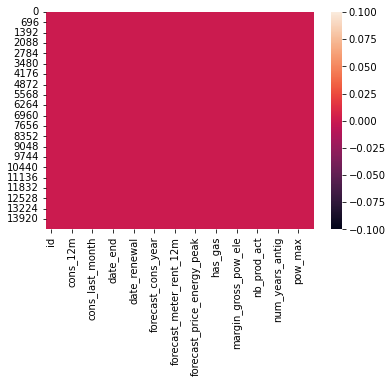

In [80]:
sns.heatmap(client_data.isnull())
plt.show()

In [81]:
client_data.isnull().sum()


id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

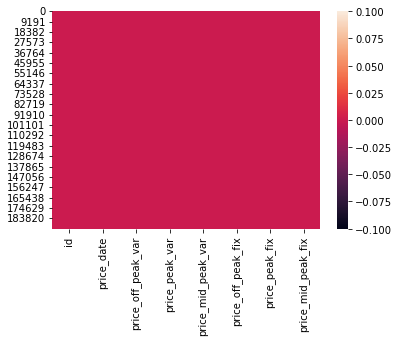

In [82]:
sns.heatmap(price_data.isnull())
plt.show()

In [84]:
price_data.isnull().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

There is no missing values in both datasets.

## Performing EDA

### Descriptive Statistics of Data

In [52]:
print("Rows and Columns of Client Data :- ", client_data.shape)
print("Rows and Columns of Price Data :- ", price_data.shape)

Rows and Columns of Client Data :-  (14606, 26)
Rows and Columns of Price Data :-  (193002, 8)


In [53]:
client_data.dtypes

id                                 object
channel_sales                      object
cons_12m                            int64
cons_gas_12m                        int64
cons_last_month                     int64
date_activ                         object
date_end                           object
date_modif_prod                    object
date_renewal                       object
forecast_cons_12m                 float64
forecast_cons_year                  int64
forecast_discount_energy          float64
forecast_meter_rent_12m           float64
forecast_price_energy_off_peak    float64
forecast_price_energy_peak        float64
forecast_price_pow_off_peak       float64
has_gas                            object
imp_cons                          float64
margin_gross_pow_ele              float64
margin_net_pow_ele                float64
nb_prod_act                         int64
net_margin                        float64
num_years_antig                     int64
origin_up                         

### Categorical Features


In [65]:
client_data.describe(include='object')

,id,channel_sales,date_activ,date_end,date_modif_prod,date_renewal,has_gas,origin_up
count,14606,14606,14606,14606,14606,14606,14606,14606
unique,14606,8,1796,368,2129,386,2,6
top,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,2009-08-01,2016-02-01,2015-11-01,2015-06-23,f,lxidpiddsbxsbosboudacockeimpuepw
freq,1,6754,95,145,721,587,11955,7097


In [61]:
client_data.select_dtypes(include='object').nunique()

id                 14606
channel_sales          8
date_activ          1796
date_end             368
date_modif_prod     2129
date_renewal         386
has_gas                2
origin_up              6
dtype: int64

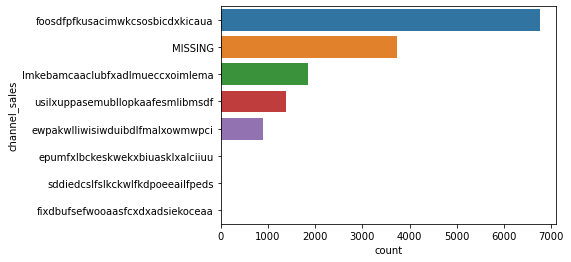

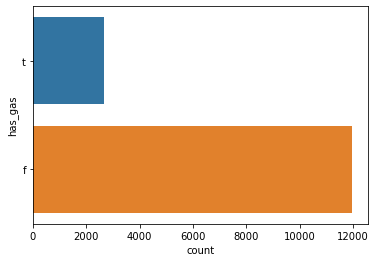

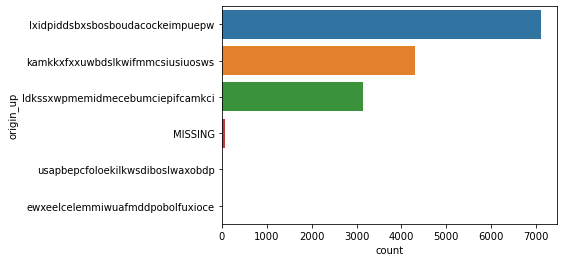

In [62]:
##Plot each categorical feature
for column in client_data.select_dtypes(include='object'):
    if client_data[column].nunique() < 10:
        sns.countplot(y=column, data=client_data)
        plt.show()

### Numerical Features


In [101]:
client_data.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [78]:
price_data.describe().T


,count,mean,std,min,25%,50%,75%,max
price_off_peak_var,193002.0,0.141027,0.025032,0.0,0.125976,0.146033,0.151635,0.280700
price_peak_var,193002.0,0.054630,0.049924,0.0,0.000000,0.085483,0.101673,0.229788
price_mid_peak_var,193002.0,0.030496,0.036298,0.0,0.000000,0.000000,0.072558,0.114102
price_off_peak_fix,193002.0,43.334477,5.410297,0.0,40.728885,44.266930,44.444710,59.444710
price_peak_fix,193002.0,10.622875,12.841895,0.0,0.000000,0.000000,24.339581,36.490692
price_mid_peak_fix,193002.0,6.409984,7.773592,0.0,0.000000,0.000000,16.226389,17.458221


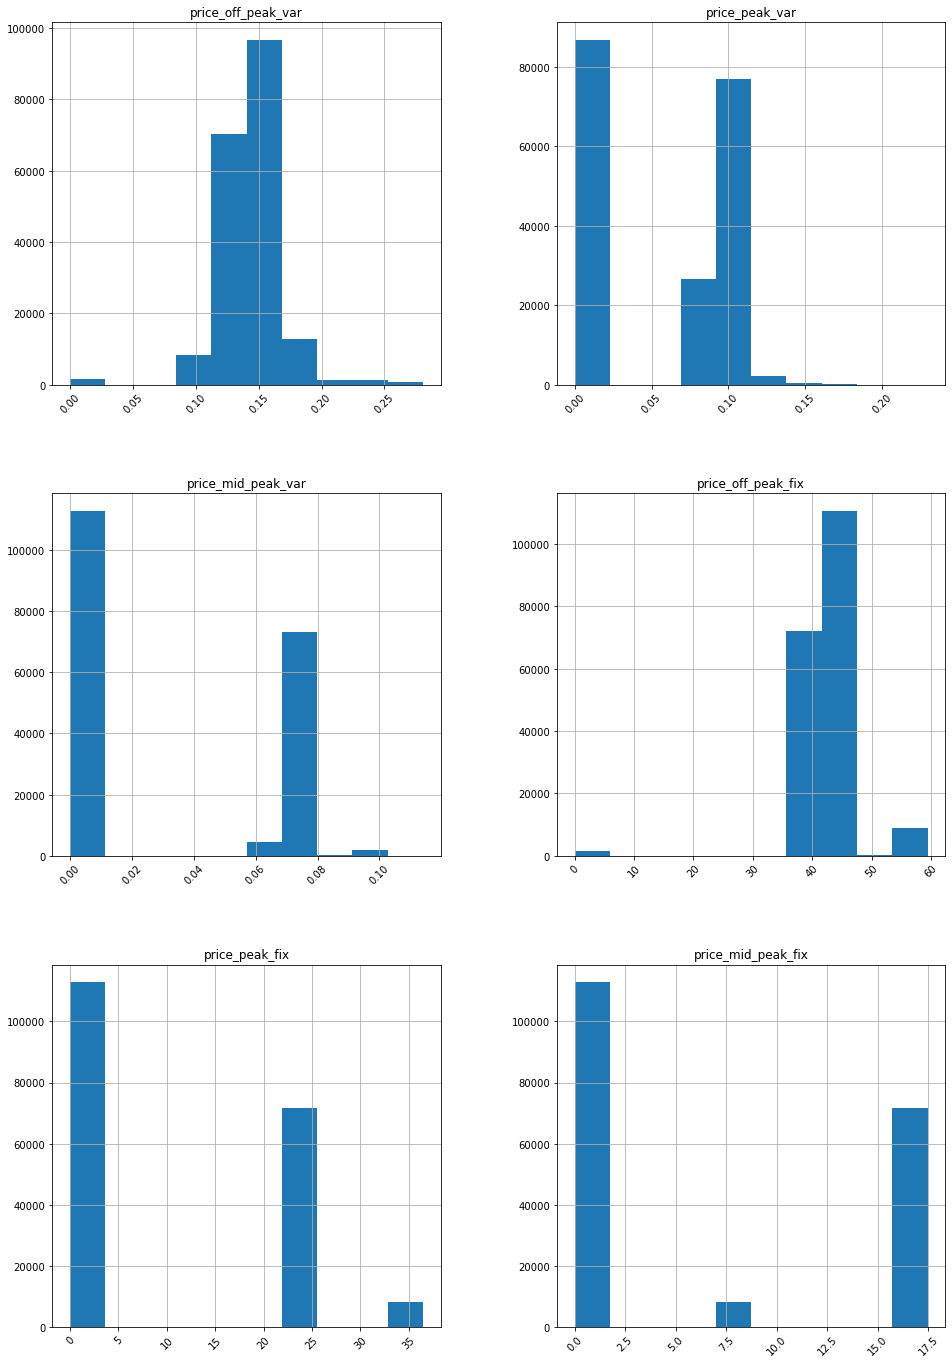

In [77]:
price_data.hist(figsize=(16,24), xrot=45)
plt.show()

Overall the price data are categorical values, with no outliers


## Data Visualization

In [86]:

def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50 ):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

In [94]:
churn = client_df[['id', 'churn']]
churn.head()

,id,churn
0,24011ae4ebbe3035111d65fa7c15bc57,1
1,d29c2c54acc38ff3c0614d0a653813dd,0
2,764c75f661154dac3a6c254cd082ea7d,0
3,bba03439a292a1e166f80264c16191cb,0
4,149d57cf92fc41cf94415803a877cb4b,0


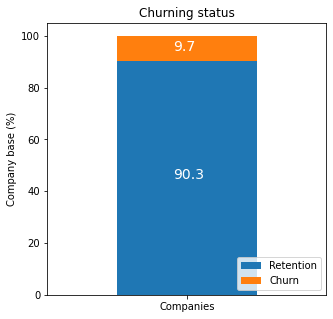

In [92]:
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

In [89]:
print("\n ----- Value Counts -----\n")
print(client_data['churn'].value_counts())



 ----- Value Counts -----

0    13187
1     1419
Name: churn, dtype: int64


#### Nearly 10% (9.7%) of the customers have churned and 90% of the customers have not churned.


### Sales Channel

In [161]:
channel=client_data[['id', 'channel_sales', 'churn']]
channel = channel.groupby([channel['channel_sales'], channel['churn']])['id'].count().unstack(level=1).fillna(0)

In [162]:
channel_churn=(channel.div(channel.sum(axis=1),axis=0)*100).sort_values(by=[1],ascending=False)


Text(0, 0.5, 'Company base(%)')

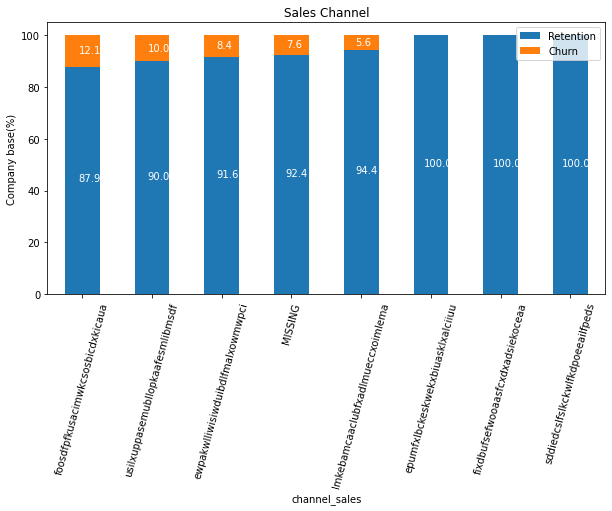

In [171]:
ax=channel_churn.plot(kind='bar',stacked=True,figsize=(10,5),rot=75)
annotate_stacked_bars(ax, textsize=10)
plt.title('Sales Channel')
plt.legend(['Retention','Churn'],loc='upper right')
plt.ylabel('Company base(%)')

#### There are 5 Sales Channels that have churns.



### Consumption

In [102]:
consumption = client_data[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]
consumption.describe().T


,count,mean,std,min,25%,50%,75%,max
cons_12m,14606.0,159220.286252,573465.264198,0.0,5674.75,14115.500,40763.75,6207104.00
cons_gas_12m,14606.0,28092.375325,162973.059057,0.0,0.00,0.000,0.00,4154590.00
cons_last_month,14606.0,16090.269752,64364.196422,0.0,0.00,792.500,3383.00,771203.00
imp_cons,14606.0,152.786896,341.369366,0.0,0.00,37.395,193.98,15042.79
churn,14606.0,0.097152,0.296175,0.0,0.00,0.000,0.00,1.00


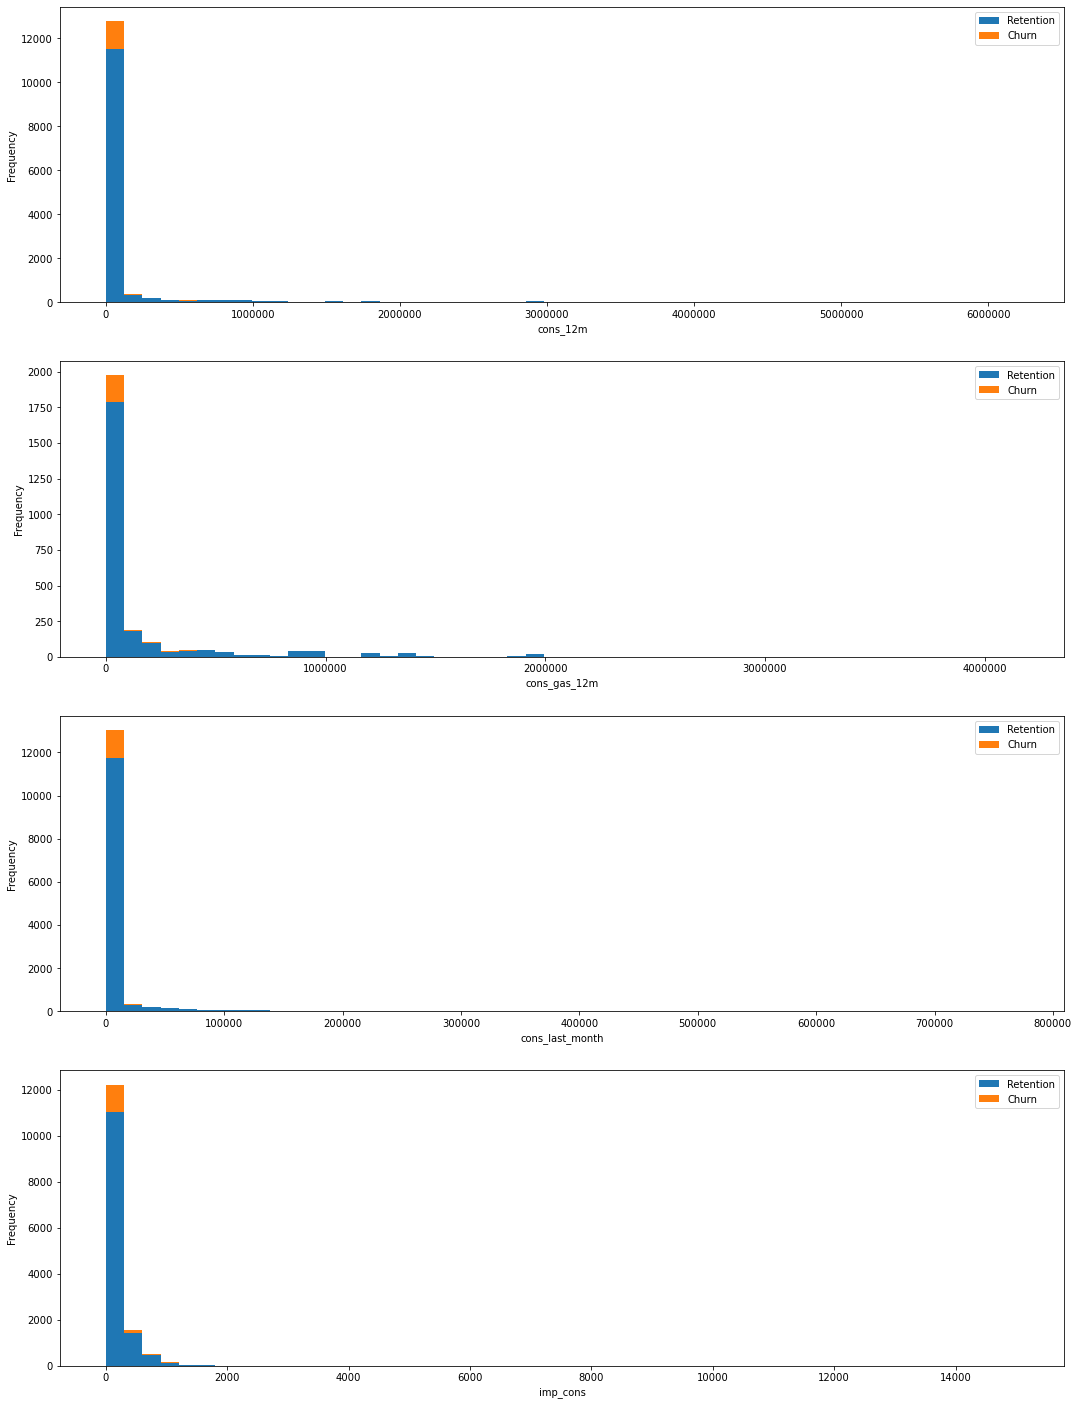

In [110]:
fig, axs = plt.subplots(nrows=4, figsize=(18, 25))
plot_distribution(consumption, 'cons_12m', axs[0])
plot_distribution(consumption[consumption['has_gas'] == 't'], 'cons_gas_12m', axs[1])
plot_distribution(consumption, 'cons_last_month', axs[2])
plot_distribution(consumption, 'imp_cons', axs[3])

plt.savefig("Distribution of the consumption.png", bbox_inches="tight")


The distribution of the consumptions is highly right skewed and has a long tail, we need to check the outliers by use boxplot


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/si

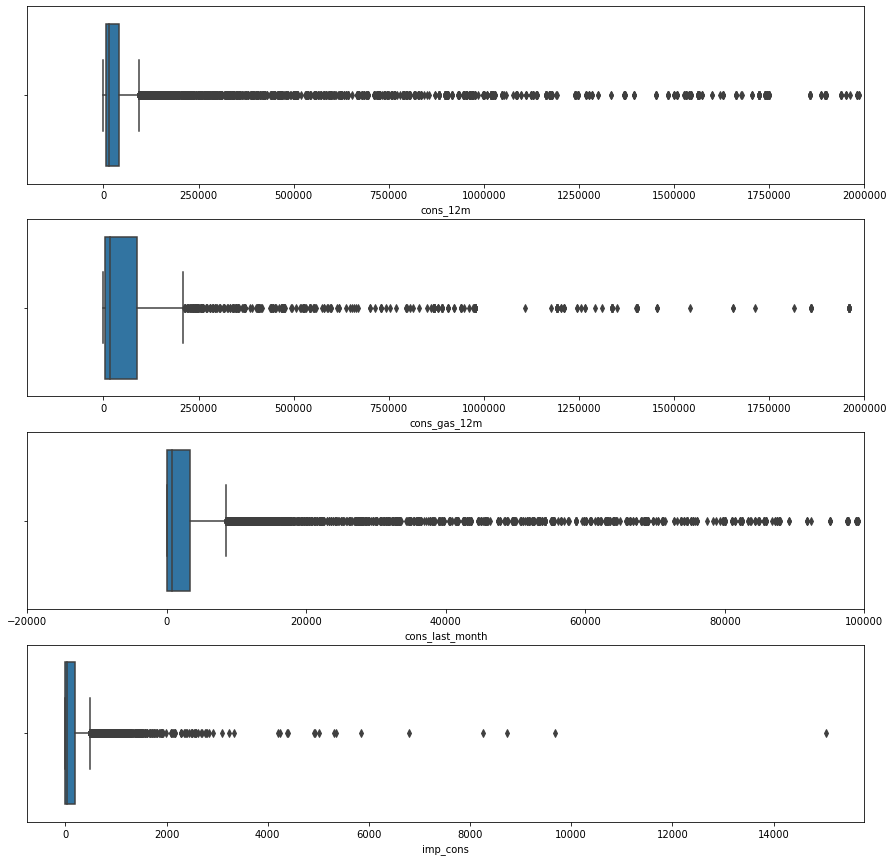

In [160]:
fig,axs=plt.subplots(nrows=4,figsize=(15,15))
sns.boxplot(consumption['cons_12m'],ax=axs[0])
sns.boxplot(consumption[consumption['has_gas']=='t']['cons_gas_12m'],ax=axs[1])
sns.boxplot(consumption['cons_last_month'],ax=axs[2])
sns.boxplot(consumption['imp_cons'],ax=axs[3])
for ax in axs:
    ax.ticklabel_format(style='plain',axis='x')
axs[0].set_xlim(-200000,2000000)
axs[1].set_xlim(-200000,2000000)
axs[2].set_xlim(-20000,100000)
plt.show();

### Forecast

In [146]:
forecast = client_data[["id", "forecast_cons_12m", "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
    "forecast_price_energy_off_peak","forecast_price_energy_peak", "forecast_price_pow_off_peak","churn"]]

forecast.head()

,id,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1
1,d29c2c54acc38ff3c0614d0a653813dd,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0
2,764c75f661154dac3a6c254cd082ea7d,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0
3,bba03439a292a1e166f80264c16191cb,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0
4,149d57cf92fc41cf94415803a877cb4b,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,0


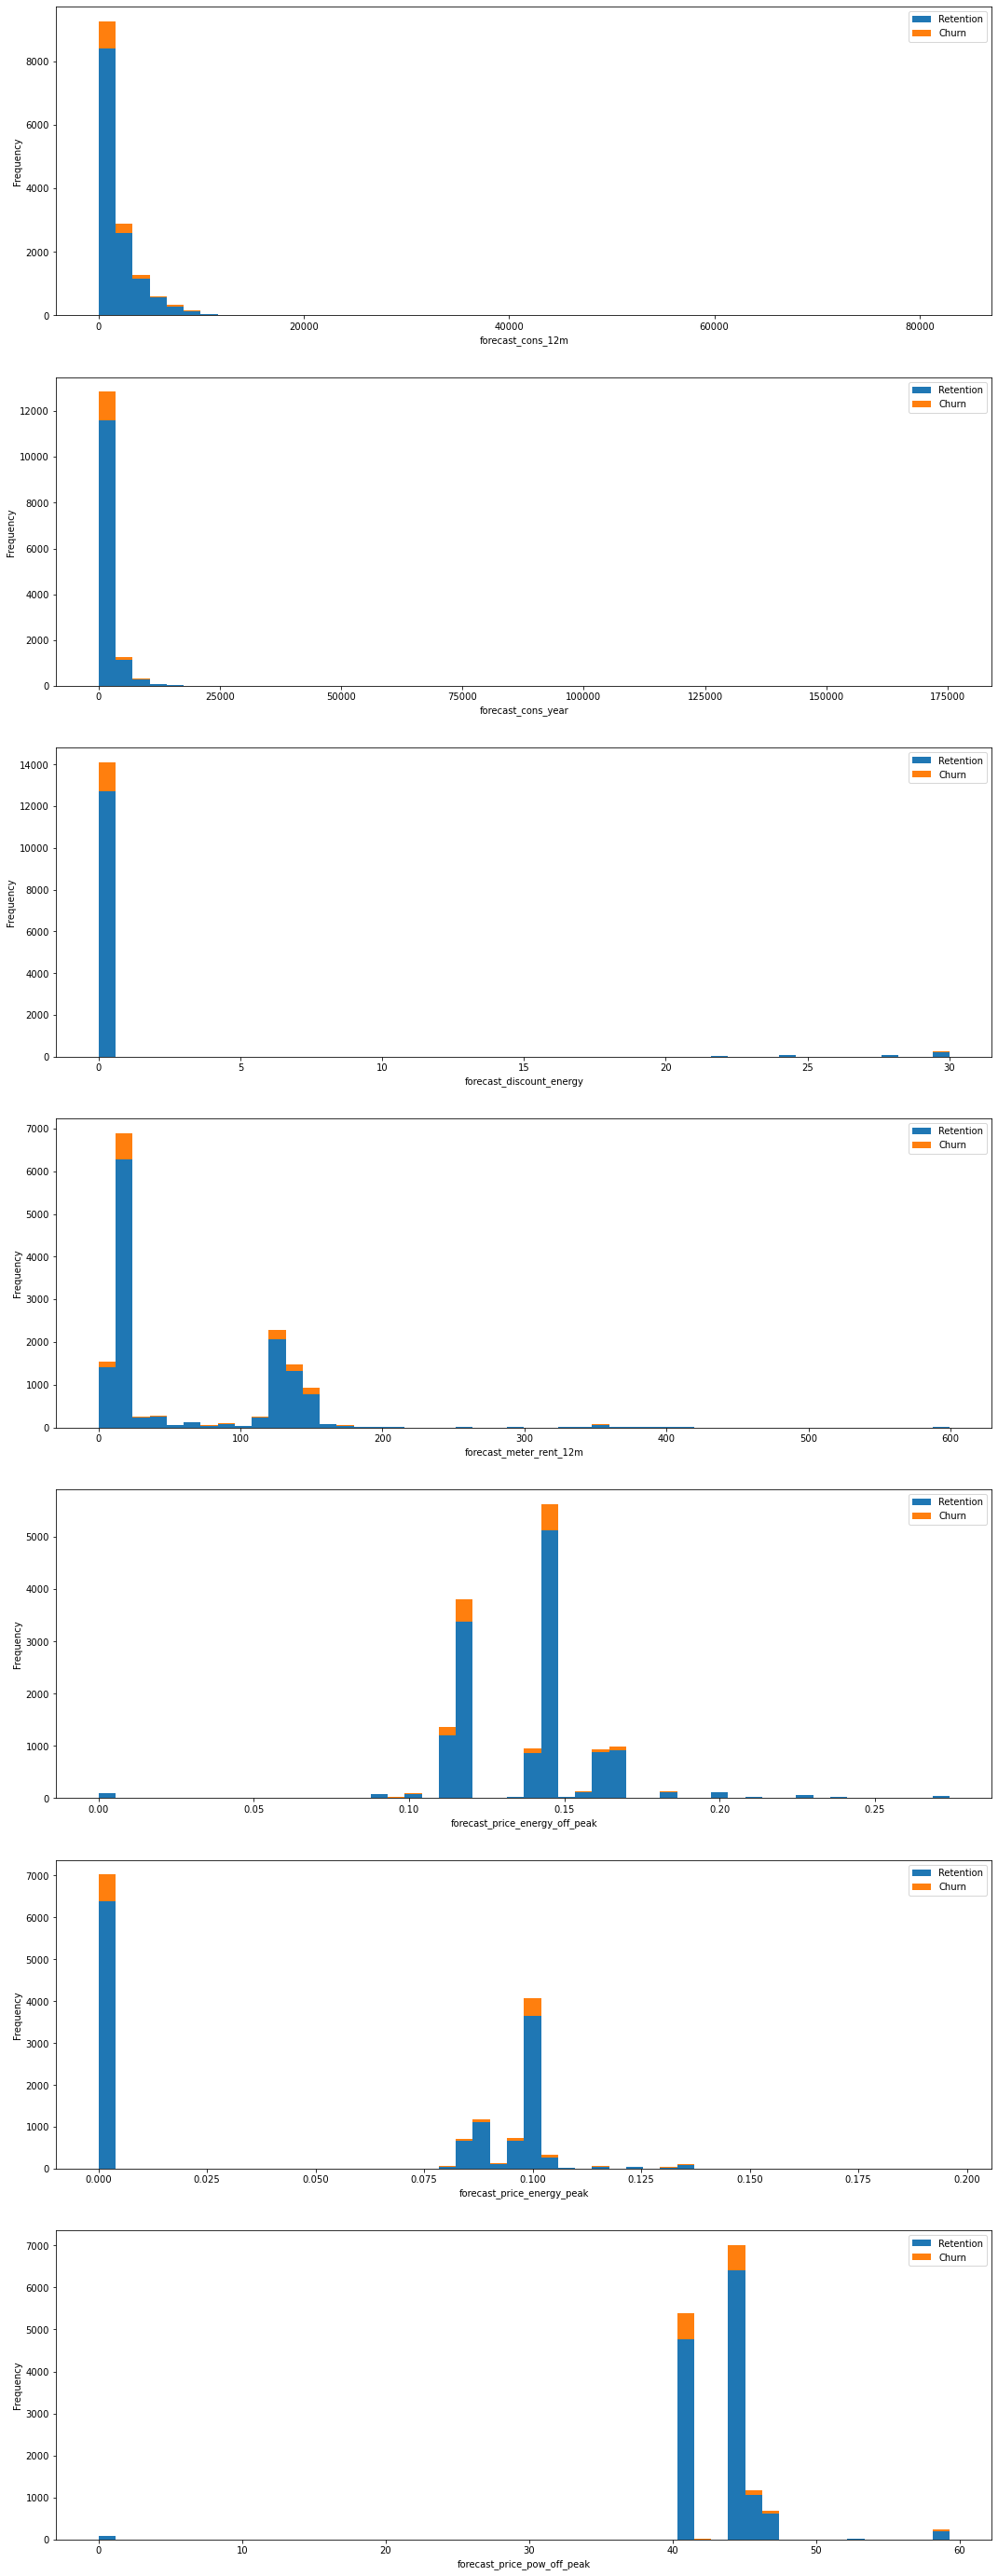

In [112]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))

# Plot histogram
plot_distribution(client_data, "forecast_cons_12m", axs[0])
plot_distribution(client_data, "forecast_cons_year", axs[1])
plot_distribution(client_data, "forecast_discount_energy", axs[2])
plot_distribution(client_data, "forecast_meter_rent_12m", axs[3])
plot_distribution(client_data, "forecast_price_energy_off_peak", axs[4])
plot_distribution(client_data, "forecast_price_energy_peak", axs[5])
plot_distribution(client_data, "forecast_price_pow_off_peak", axs[6])


## Contract type


In [118]:
contract_type = client_data[['id', 'has_gas', 'churn']]
contract = contract_type.groupby([contract_type['churn'], contract_type['has_gas']])['id'].count().unstack(level=0)
contract


churn,0,1
has_gas,,
f,10753,1202
t,2434,217


In [124]:
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)
contract_percentage

churn,0,1
has_gas,,
f,89.945629,10.054371
t,91.814410,8.185590


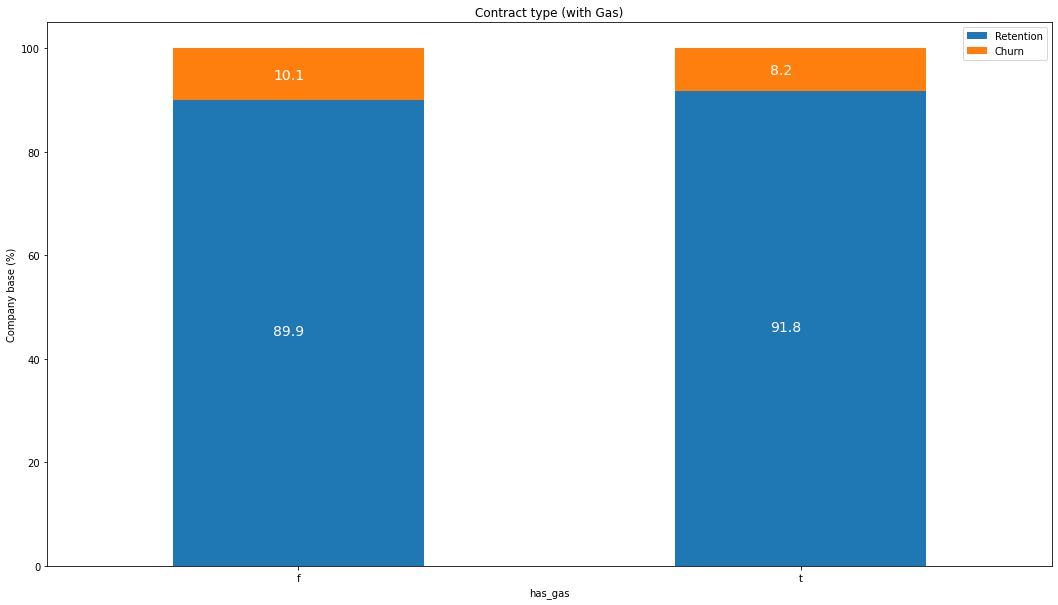

In [125]:
plot_stacked_bars(contract_percentage, 'Contract type (with Gas)')


### Margin

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


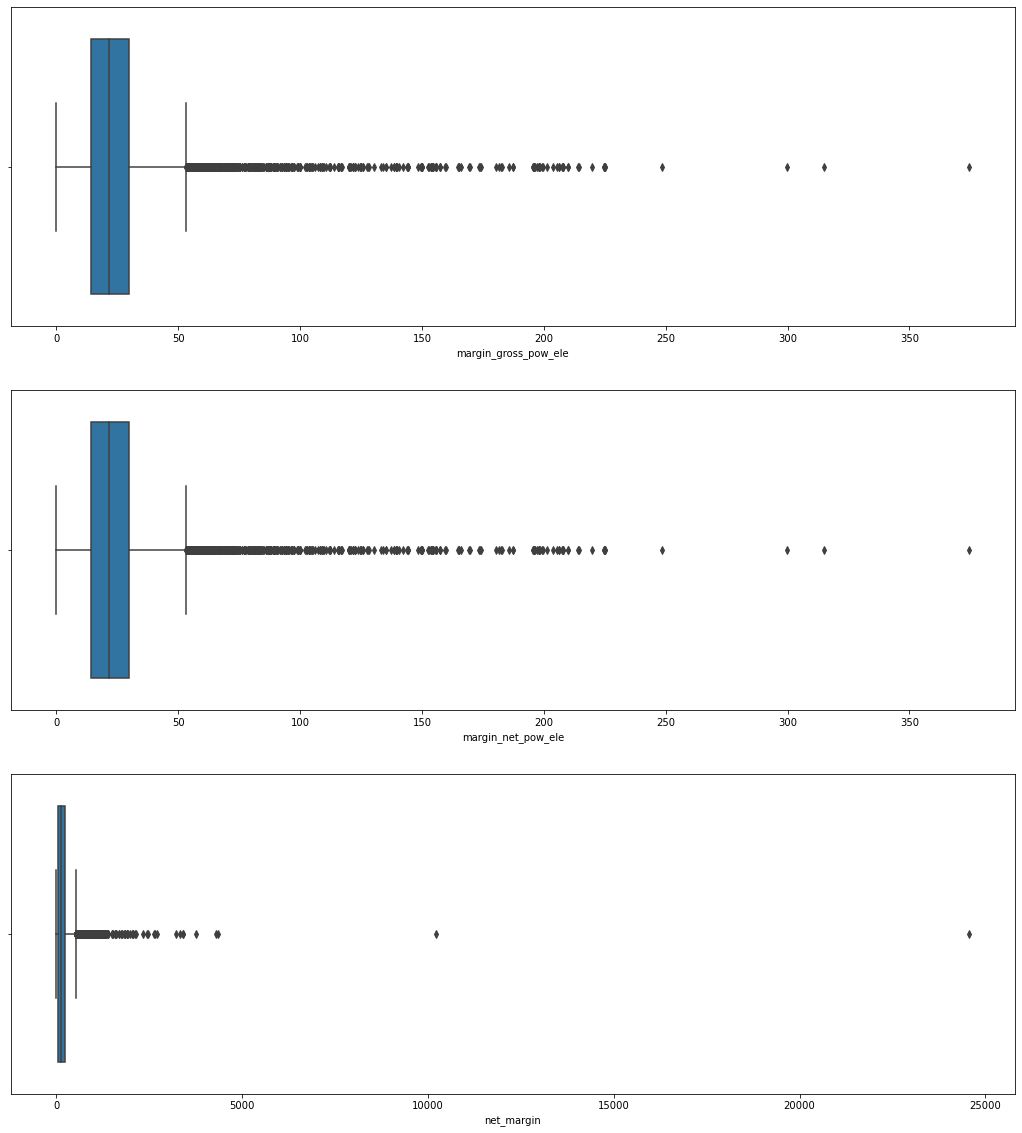

In [157]:
margin = client_data[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']]
fig, axs = plt.subplots(nrows=3, figsize=(18,20))
# Plot histogram
sns.boxplot(margin["margin_gross_pow_ele"], ax=axs[0])
sns.boxplot(margin["margin_net_pow_ele"],ax=axs[1])
sns.boxplot(margin["net_margin"], ax=axs[2])


plt.savefig("View of Margins.png", bbox_inches="tight")

plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


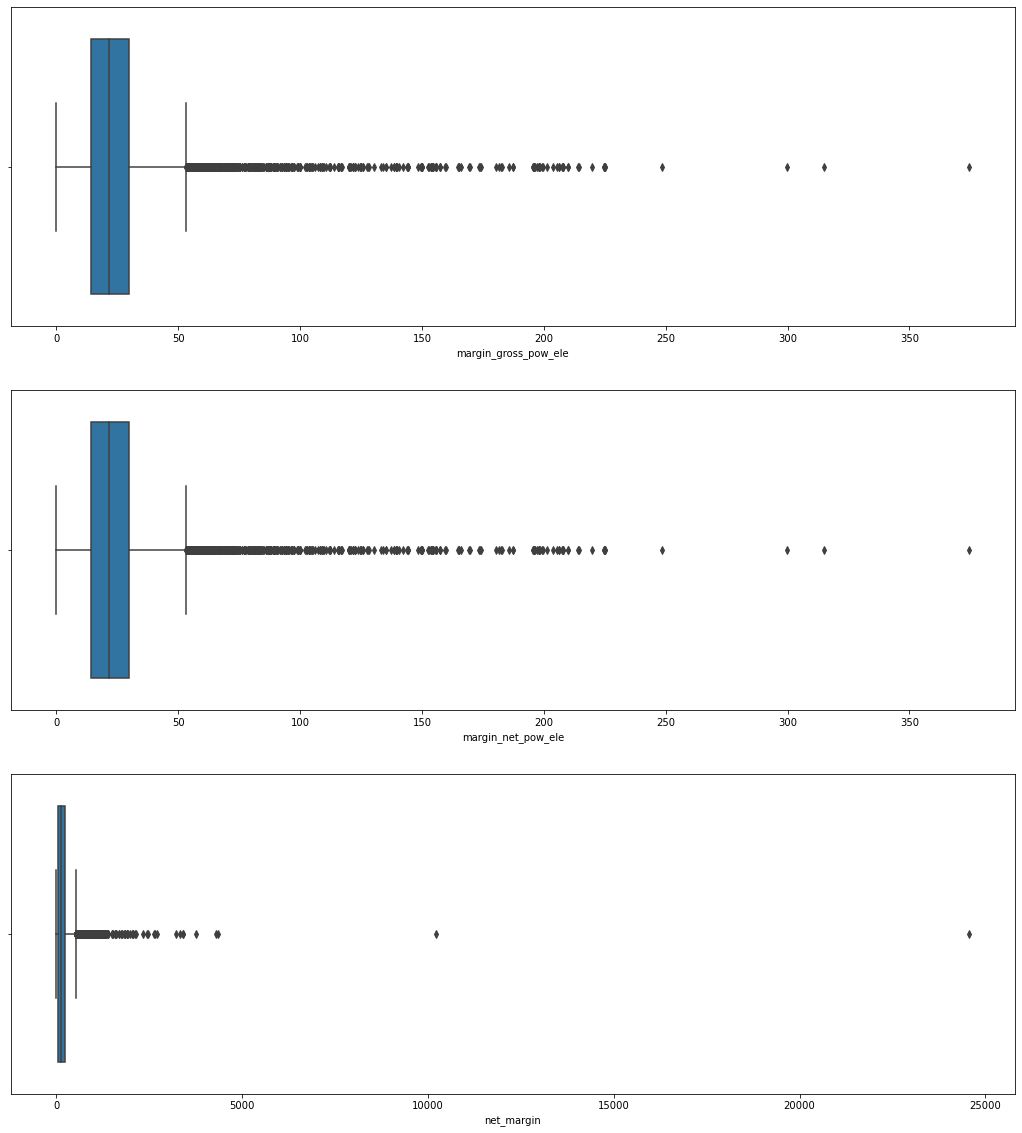

In [128]:
margin = client_data[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']]
fig, axs = plt.subplots(nrows=3, figsize=(18,20))
# Plot histogram
sns.boxplot(margin["margin_gross_pow_ele"], ax=axs[0])
sns.boxplot(margin["margin_net_pow_ele"],ax=axs[1])
sns.boxplot(margin["net_margin"], ax=axs[2])


plt.savefig("View of Margins.png", bbox_inches="tight")

plt.show()

### Hypothesis Investigation

Now, let's check customers sensitivity to price. When the price increases and some cutomers leave, then we can say these customers are sensitive to price as the increase in prices lead the customer churn. In case there is a decrease or no change in the price and cutomers still switch, it is hard to say these cutomers are sensitive to price.

Since we have the consumption data for each of the companies for the year of 2015, we will create new features to measure price sensitivity using the average of the year, the last 6 months and the last 3 months

In [133]:
# Transform date columns to datetime type
client_data["date_activ"] = pd.to_datetime(client_data["date_activ"], format='%Y-%m-%d')
client_data["date_end"] = pd.to_datetime(client_data["date_end"], format='%Y-%m-%d')
client_data["date_modif_prod"] = pd.to_datetime(client_data["date_modif_prod"], format='%Y-%m-%d')
client_data["date_renewal"] = pd.to_datetime(client_data["date_renewal"], format='%Y-%m-%d')
price_data['price_date'] = pd.to_datetime(price_data['price_date'], format='%Y-%m-%d')

# Create mean average data
mean_year = price_data.groupby(['id']).mean().reset_index()
mean_6m = price_data[price_data['price_date'] > '2015-06-01'].groupby(['id']).mean().reset_index()
mean_3m = price_data[price_data['price_date'] > '2015-10-01'].groupby(['id']).mean().reset_index()

# Comnbine into single dataframe
mean_year = mean_year.rename(index=str, columns={"price_off_peak_var": "mean_year_price_off_peak_var", 
                                                 "price_peak_var": "mean_year_price_peak_var", 
                                                 "price_mid_peak_var": "mean_year_price_mid_peak_var", 
                                                 "price_off_peak_fix": "mean_year_price_off_peak_fix", 
                                                 "price_peak_fix": "mean_year_price_peak_fix", 
                                                 "price_mid_peak_fix": "mean_year_price_mid_peak_fix"})

mean_year["mean_year_price_off_peak"] = mean_year["mean_year_price_off_peak_var"] + mean_year["mean_year_price_off_peak_fix"]
mean_year["mean_year_price_peak"] = mean_year["mean_year_price_peak_var"] + mean_year["mean_year_price_peak_fix"]
mean_year["mean_year_price_mid_peak"] = mean_year["mean_year_price_mid_peak_var"] + mean_year["mean_year_price_mid_peak_fix"]

mean_6m = mean_6m.rename(index=str, columns={"price_off_peak_var": "mean_6m_price_off_peak_var", 
                                             "price_peak_var": "mean_6m_price_peak_var", 
                                             "price_mid_peak_var": "mean_6m_price_mid_peak_var", 
                                             "price_off_peak_fix": "mean_6m_price_off_peak_fix", 
                                             "price_peak_fix": "mean_6m_price_peak_fix", 
                                             "price_mid_peak_fix": "mean_6m_price_mid_peak_fix"})

mean_6m["mean_6m_price_off_peak"] = mean_6m["mean_6m_price_off_peak_var"] + mean_6m["mean_6m_price_off_peak_fix"]
mean_6m["mean_6m_price_peak"] = mean_6m["mean_6m_price_peak_var"] + mean_6m["mean_6m_price_peak_fix"]
mean_6m["mean_6m_price_mid_peak"] = mean_6m["mean_6m_price_mid_peak_var"] + mean_6m["mean_6m_price_mid_peak_fix"]

mean_3m = mean_3m.rename(index=str, columns={"price_off_peak_var": "mean_3m_price_off_peak_var", 
                                             "price_peak_var": "mean_3m_price_peak_var", 
                                             "price_mid_peak_var": "mean_3m_price_mid_peak_var", 
                                             "price_off_peak_fix": "mean_3m_price_off_peak_fix", 
                                             "price_peak_fix": "mean_3m_price_peak_fix", 
                                             "price_mid_peak_fix": "mean_3m_price_mid_peak_fix"})

mean_3m["mean_3m_price_off_peak"] = mean_3m["mean_3m_price_off_peak_var"] + mean_3m["mean_3m_price_off_peak_fix"]
mean_3m["mean_3m_price_peak"] = mean_3m["mean_3m_price_peak_var"] + mean_3m["mean_3m_price_peak_fix"]
mean_3m["mean_3m_price_mid_peak"] = mean_3m["mean_3m_price_mid_peak_var"] + mean_3m["mean_3m_price_mid_peak_fix"]





In [134]:
price_features = pd.merge(mean_year, mean_6m, on='id')
price_features = pd.merge(price_features, mean_3m, on='id')


In [135]:
price_features.head()

,id,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_mid_peak,...,mean_6m_price_mid_peak,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,...,16.365283,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,...,0.000000,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,...,0.000000,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,16.328003,...,16.360973,0.113068,0.095385,0.069409,40.728885,24.43733,16.291555,40.841953,24.532715,16.360964
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,...,0.000000,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000


In [136]:
price_analysis = pd.merge(price_features, client_data[['id', 'churn']], on='id')
price_analysis.head()

,id,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_mid_peak,...,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak,churn
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,...,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274,0
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,...,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,...,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000,0
3,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,...,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000,0
4,0013f326a839a2f6ad87a1859952d227,0.126076,0.105542,0.074921,40.728885,24.437330,16.291555,40.854961,24.542872,16.366476,...,0.121647,0.103413,0.075460,40.728885,24.43733,16.291555,40.850532,24.540743,16.367015,0


In [137]:
price_analysis.dtypes

id                               object
mean_year_price_off_peak_var    float64
mean_year_price_peak_var        float64
mean_year_price_mid_peak_var    float64
mean_year_price_off_peak_fix    float64
mean_year_price_peak_fix        float64
mean_year_price_mid_peak_fix    float64
mean_year_price_off_peak        float64
mean_year_price_peak            float64
mean_year_price_mid_peak        float64
mean_6m_price_off_peak_var      float64
mean_6m_price_peak_var          float64
mean_6m_price_mid_peak_var      float64
mean_6m_price_off_peak_fix      float64
mean_6m_price_peak_fix          float64
mean_6m_price_mid_peak_fix      float64
mean_6m_price_off_peak          float64
mean_6m_price_peak              float64
mean_6m_price_mid_peak          float64
mean_3m_price_off_peak_var      float64
mean_3m_price_peak_var          float64
mean_3m_price_mid_peak_var      float64
mean_3m_price_off_peak_fix      float64
mean_3m_price_peak_fix          float64
mean_3m_price_mid_peak_fix      float64


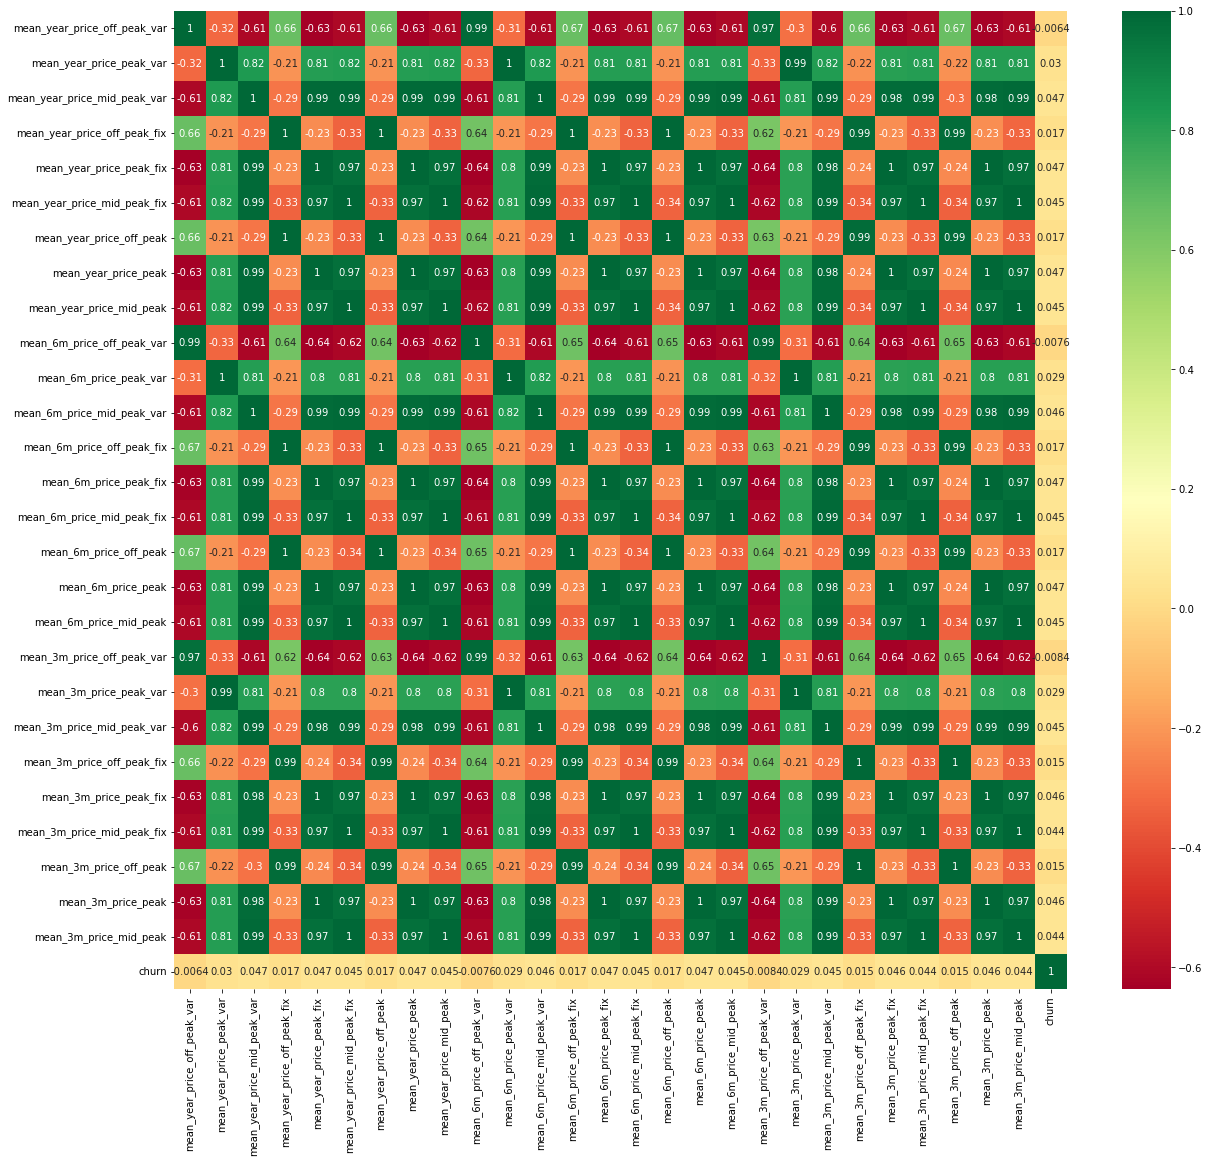

In [141]:
corr = price_analysis.corr()
# Plot correlation
plt.figure(figsize=(20,18))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values,
            annot = True, cmap='RdYlGn', annot_kws={'size':10})

# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig("View of Correlation.png", bbox_inches="tight")
plt.show()
            

Although the association with churn is generally quite modest, the correlation plot reveals a higher degree of correlation with other price sensitivity variables. This suggests that price sensitivity and churn have a shaky linear relationship. This shows that we might need to develop the feature differently if we want price sensivity to be a significant factor in predicting churn

Now, we will merge the client data with price churn data for modeling in the next move.

In [143]:
churn_data = pd.merge(client_df.drop(columns=['churn']), price_analysis, on='id')
churn_data.head()


,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0


In [155]:
churn_data.dtypes

id                                 object
channel_sales                      object
cons_12m                            int64
cons_gas_12m                        int64
cons_last_month                     int64
date_activ                         object
date_end                           object
date_modif_prod                    object
date_renewal                       object
forecast_cons_12m                 float64
forecast_cons_year                  int64
forecast_discount_energy          float64
forecast_meter_rent_12m           float64
forecast_price_energy_off_peak    float64
forecast_price_energy_peak        float64
forecast_price_pow_off_peak       float64
has_gas                            object
imp_cons                          float64
margin_gross_pow_ele              float64
margin_net_pow_ele                float64
nb_prod_act                         int64
net_margin                        float64
num_years_antig                     int64
origin_up                         

In [156]:
for column in churn_data.select_dtypes(include='object'):
    if client_data[column].nunique() < 10:
        display(client_data.groupby(column).mean())

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
channel_sales,,,,,,,,,,,,,,,,,,
MISSING,1.136814e+05,27238.404832,12080.198926,1731.665380,1405.416107,0.640537,63.766886,0.134084,0.052045,42.871547,145.033208,22.311721,22.311721,1.335034,170.046639,6.492617,18.464512,0.075973
epumfxlbckeskwekxbiuasklxalciiuu,2.307933e+04,0.000000,1626.333333,2697.370000,1626.333333,0.000000,117.086667,0.112863,0.096523,40.606701,153.466667,25.410000,25.410000,1.000000,188.313333,3.000000,18.561667,0.000000
ewpakwlliwisiwduibdlfmalxowmwpci,3.833184e+04,11160.811870,3385.600224,1637.265106,1011.852184,0.798432,58.406685,0.139112,0.047134,43.244151,117.096305,27.052923,27.052923,1.265398,163.215767,4.272116,17.213589,0.083987
fixdbufsefwooaasfcxdxadsiekoceaa,1.254515e+06,237706.500000,156509.000000,1944.360000,4022.000000,0.000000,81.875000,0.140773,0.093976,42.459039,452.900000,26.845000,26.845000,1.500000,236.990000,3.000000,30.196000,0.000000
foosdfpfkusacimwkcsosbicdxkicaua,9.794777e+04,24110.728605,9658.783980,1904.473952,1384.507995,1.256589,65.505937,0.137102,0.049406,43.174368,153.392504,25.629775,25.628784,1.266953,199.153487,4.414125,18.414440,0.121410
lmkebamcaaclubfxadlmueccxoimlema,6.384058e+05,67028.827998,64649.114487,2474.856479,2049.481281,0.258275,66.279957,0.138036,0.062418,42.855542,220.775768,23.461736,23.444731,1.304938,238.470846,5.196419,18.520695,0.055887
sddiedcslfslkckwlfkdpoeeailfpeds,1.740882e+04,0.000000,1671.000000,2152.671818,1671.000000,0.000000,33.270000,0.140091,0.025332,43.637800,212.875455,21.980909,21.980909,1.000000,188.930000,3.000000,13.007818,0.000000
usilxuppasemubllopkaafesmlibmsdf,1.962696e+04,8752.121455,1652.636364,1396.959905,833.973091,1.496727,48.215258,0.144668,0.037838,43.908987,101.948480,25.318945,25.318945,1.304727,143.651367,4.043636,15.975139,0.100364


,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
has_gas,,,,,,,,,,,,,,,,,,
f,101709.902886,490.024843,9705.482727,1758.585172,1300.392137,0.954161,61.439534,0.137663,0.048996,43.185269,141.935659,24.724186,24.721564,1.048515,176.055746,4.991468,17.801625,0.100544
t,418570.204451,152568.459826,44883.226707,2364.806941,1847.887212,1.023387,70.515734,0.135571,0.057229,42.881062,201.721841,23.847801,23.845277,2.391928,248.831071,5.026405,19.639141,0.081856


,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
origin_up,,,,,,,,,,,,,,,,,,
MISSING,70230.078125,9437.578125,6532.859375,2734.903438,2346.437500,1.750000,66.822656,0.138452,0.056527,43.932589,255.776406,30.020000,30.020000,1.328125,274.498594,4.750000,23.839875,0.062500
ewxeelcelemmiwuafmddpobolfuxioce,3204.000000,0.000000,0.000000,477.280000,0.000000,0.000000,10.840000,0.144902,0.000000,44.311378,0.000000,15.720000,15.720000,1.000000,46.220000,6.000000,13.200000,0.000000
kamkkxfxxuwbdslkwifmmcsiusiuosws,235219.605962,38274.626456,23858.117606,1606.260913,1210.852585,0.493945,52.223640,0.141883,0.049892,43.577119,134.930950,23.419399,23.419399,1.283884,154.698209,5.472986,16.128833,0.060084
ldkssxwpmemidmecebumciepifcamkci,123143.984117,20437.287484,12768.479034,1988.156477,1569.960292,0.677891,70.039390,0.133475,0.055542,43.079240,163.617201,22.139447,22.127367,1.298285,197.039835,5.786213,19.072861,0.083863
lxidpiddsbxsbosboudacockeimpuepw,130091.300550,25507.313231,12952.556855,1966.926872,1430.170635,1.374243,66.559837,0.136172,0.048567,42.874155,157.864906,26.290962,26.290962,1.294632,205.999376,4.363111,18.884692,0.125828
usapbepcfoloekilkwsdiboslwaxobdp,62681.000000,0.000000,15076.000000,1098.435000,1604.000000,0.000000,25.940000,0.156647,0.044269,45.061378,204.010000,8.160000,8.160000,1.000000,125.200000,3.500000,9.803000,0.000000


In [144]:
churn_data.to_csv('clean_data_modeling.csv')